<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 144.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 185.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 127.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 116.6 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-08-14 15:19:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.0MB/s    in 2.5s    

2025-08-14 15:19:11 (60.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [8]:
# Set max_rows to None to display all rows
pd.set_option('display.max_rows', None)
# Set the option to display all columns
pd.set_option('display.max_columns', None)
# ===================================================================================================
# Functional automatization & Data Preprocessing

def get_summary_stats(df):
    """
    Returns summary statistics for each column in the DataFrame.
    """
    return pd.DataFrame({
        "Column name": df.columns,  # Column names
        "DataType": df.dtypes.values,  # Data types of columns
        "Number of rows": df.shape[0],  # Total number of rows
        "Number of columns": df.shape[1],  # Total number of columns
        "Not-Null Columns": df.notnull().sum().values,  # Count of non-missing values
        "Missing Count": df.isnull().sum().values,  # Count of missing values
        "Missing Percentage": (df.isnull().mean() * 100).values  # Percentage of missing values
    })

summary_stats = get_summary_stats(df)
display(summary_stats)

# ===================================================================================================

# ===================================================================================================
def split_and_explode(df, column, sep=';'):
    """
    Split a column by a separator and explode it into multiple rows.
    Also strips leading/trailing spaces from each element.

    df: input DataFrame
    column: name of the column to split & explode
    sep: separator to split the string (default: ';')
    """
    df_copy = df.copy()
    # Split the column
    df_copy[column] = df_copy[column].str.split(sep)
    # Explode into multiple rows
    df_copy = df_copy.explode(column)
    # Remove leading/trailing spaces
    df_copy[column] = df_copy[column].str.strip()
    
    return df_copy
# ===================================================================================================

# ===================================================================================================
# Age mapping
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# YearsCodePro mapping
years_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

def prepare_dataframe(df, columns, remove_outliers=False, iqr_column=None):
    """
    Prepares a DataFrame for plotting or analysis.
    
    Parameters:
        df (DataFrame): Original DataFrame.
        columns (list): List of columns to keep (drop rows with NaN in these columns).
        remove_outliers (bool): Whether to remove extreme values using IQR.
        iqr_column (str): Column used for IQR calculation.
    
    Returns:
        DataFrame: Cleaned DataFrame ready for analysis.
    """
    df_clean = df.copy()
    
    # Map Age values to numerical values
    if 'Age' in df_clean.columns:
        df_clean['Age_mapped'] = df_clean['Age'].map(age_mapping)
    
    # Replace text-based YearsCodePro values and convert to numeric
    if 'YearsCodePro' in df_clean.columns:
        df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace(years_mapping)
        df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
    
    # Drop NaN values in the required columns
    df_clean = df_clean.dropna(subset=columns).copy()
    
    # Remove outliers if enabled
    if remove_outliers and iqr_column:
        Q1 = df_clean[iqr_column].quantile(0.25)
        Q3 = df_clean[iqr_column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[iqr_column] >= lower) & (df_clean[iqr_column] <= upper)].copy()
    
    return df_clean
# ===================================================================================================

,Column name,DataType,Number of rows,Number of columns,Not-Null Columns,Missing Count,Missing Percentage
0,ResponseId,int64,65437,114,65437,0,0.000000
1,MainBranch,object,65437,114,65437,0,0.000000
2,Age,object,65437,114,65437,0,0.000000
3,Employment,object,65437,114,65437,0,0.000000
4,RemoteWork,object,65437,114,54806,10631,16.246160
5,Check,object,65437,114,65437,0,0.000000
6,CodingActivities,object,65437,114,54466,10971,16.765744
7,EdLevel,object,65437,114,60784,4653,7.110656
8,LearnCode,object,65437,114,60488,4949,7.563000
9,LearnCodeOnline,object,65437,114,49237,16200,24.756636


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


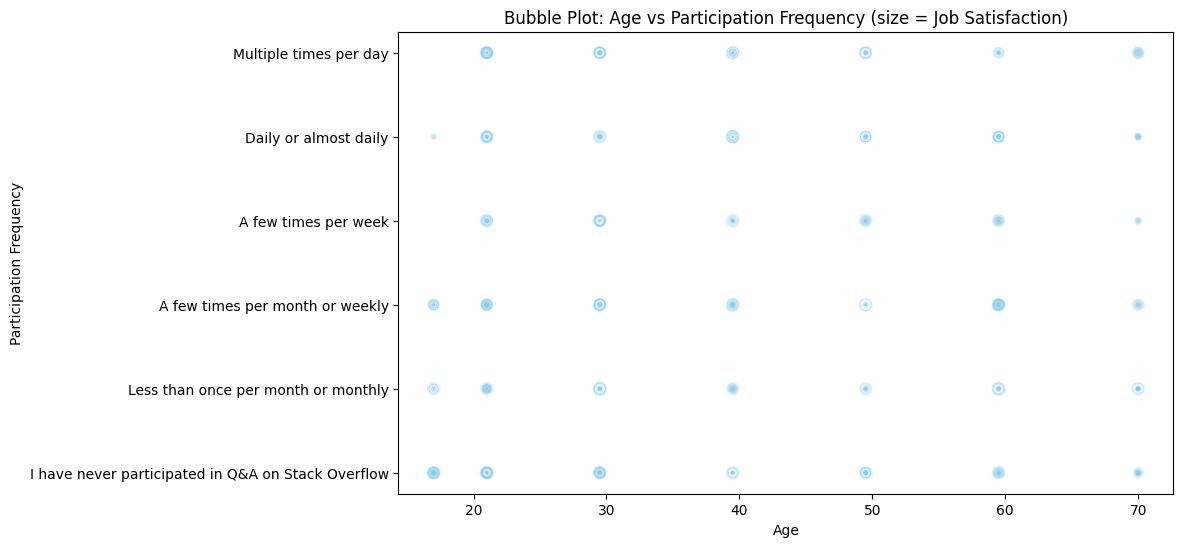

In [12]:
##Write your code here
# ===================================================================================================
# Mapping participation frequency to numbers
freq_mapping = {
    'I have never participated in Q&A on Stack Overflow': 0,
    'Less than once per month or monthly': 1,
    'A few times per month or weekly': 2,
    'A few times per week': 3,
    'Daily or almost daily': 4,
    'Multiple times per day': 5
}

# ===================================================================================================
# Prepare DataFrame for bubble plot
columns_needed = ['Age', 'SOPartFreq', 'JobSatPoints_6']
df_bubble = prepare_dataframe(df, columns_needed)

# Map Age and SOPartFreq for plotting
df_bubble['SOPartFreq_mapped'] = df_bubble['SOPartFreq'].map(freq_mapping)

# Optional: remove extreme JobSatPoints_6 values
# Q1 = df_bubble['JobSatPoints_6'].quantile(0.25)
# Q3 = df_bubble['JobSatPoints_6'].quantile(0.75)
# IQR = Q3 - Q1
# upper_bound = Q3 + 1.5 * IQR
# df_bubble = df_bubble[df_bubble['JobSatPoints_6'] <= upper_bound]

# ===================================================================================================
# Plotting bubble plot
plt.figure(figsize=(10,6))
plt.scatter(
    df_bubble['Age_mapped'], 
    df_bubble['SOPartFreq_mapped'], 
    s=df_bubble['JobSatPoints_6'],  # Bubble size by job satisfaction
    alpha=0.5, 
    color='skyblue', 
    edgecolors='w'
)

plt.xlabel('Age')
plt.ylabel('Participation Frequency')
plt.title('Bubble Plot: Age vs Participation Frequency (size = Job Satisfaction)')
plt.yticks(list(freq_mapping.values()), list(freq_mapping.keys()))  # Show text labels on Y-axis
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


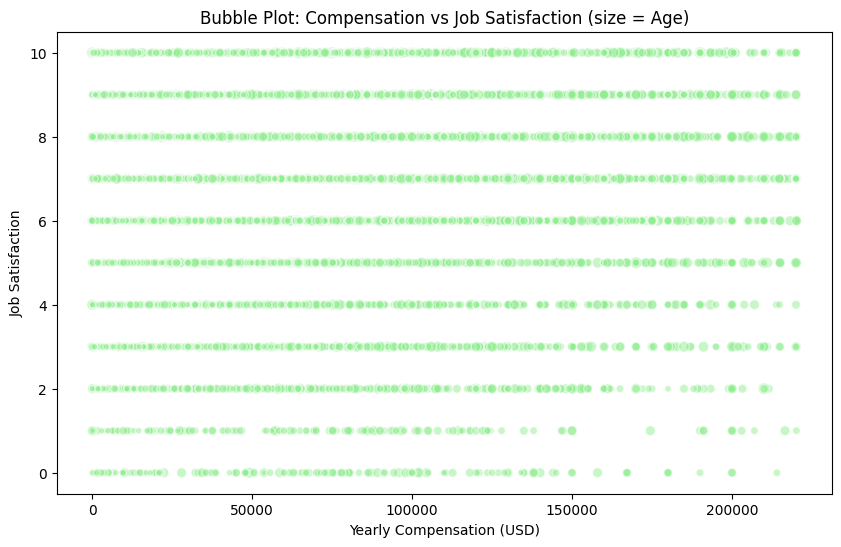

In [13]:
##Write your code here
# ===================================================================================================
# Prepare DataFrame for bubble plot
columns_needed = ['ConvertedCompYearly', 'JobSat', 'Age']
df_bubble = prepare_dataframe(df, columns_needed, remove_outliers=True, iqr_column='ConvertedCompYearly')

# ===================================================================================================
# Plotting bubble plot
plt.figure(figsize=(10,6))
plt.scatter(
    df_bubble['ConvertedCompYearly'], 
    df_bubble['JobSat'], 
    s=df_bubble['Age_mapped'],  # Bubble size by age
    alpha=0.5, 
    color='lightgreen', 
    edgecolors='w'
)

plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot: Compensation vs Job Satisfaction (size = Age)')
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



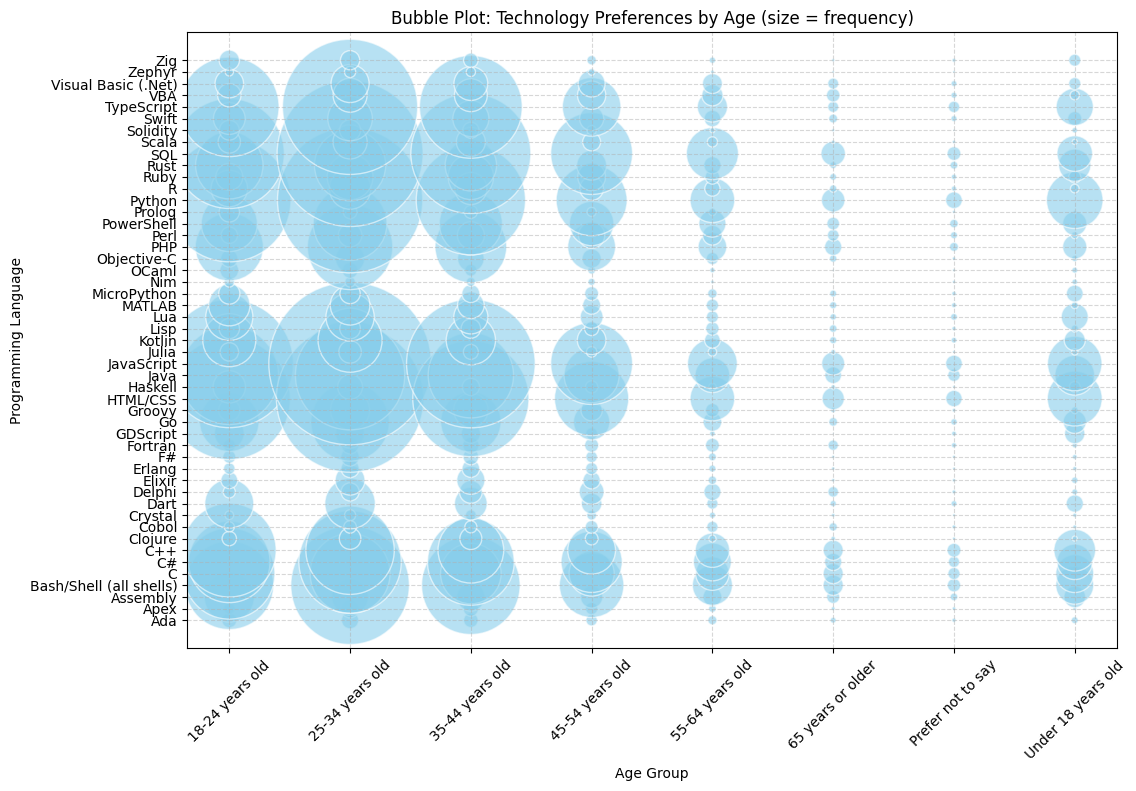

In [17]:
##Write your code here
# ===================================================================================================
# Prepare DataFrame for needed columns
columns_needed = ['Age', 'LanguageHaveWorkedWith']
df_lang = prepare_dataframe(df, columns_needed)

# ===================================================================================================
# Split languages and explode
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang = df_lang.explode('LanguageHaveWorkedWith')

# Remove leading/trailing spaces in language names
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.strip()

# ===================================================================================================
# Group by Age and Language, count frequencies
lang_counts = (
    df_lang.groupby(['Age', 'LanguageHaveWorkedWith'])
    .size()
    .reset_index(name='Frequency')
)

# ===================================================================================================
# Bubble plot
plt.figure(figsize=(12,8))
plt.scatter(
    lang_counts['Age'],
    lang_counts['LanguageHaveWorkedWith'],
    s=lang_counts['Frequency'],  # Scale bubble size
    alpha=0.6,
    c='skyblue',
    edgecolors='w'
)

plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.title('Bubble Plot: Technology Preferences by Age (size = frequency)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


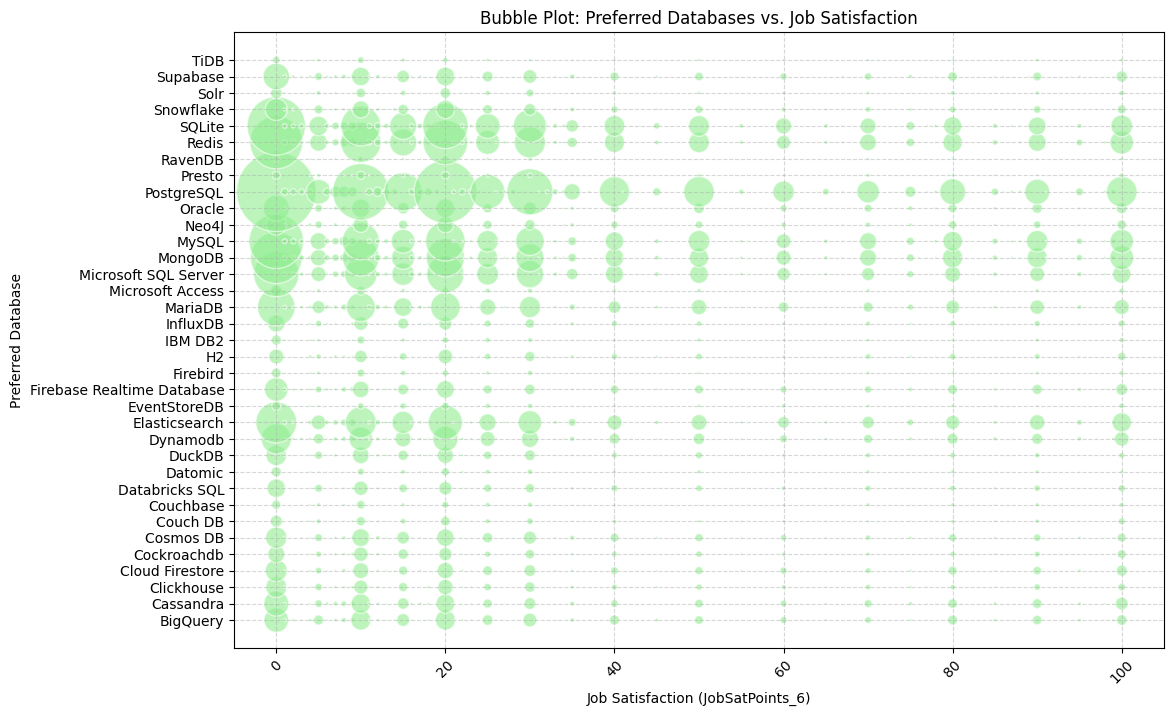

In [19]:
##Write your code here
# ===================================================================================================
# Prepare DataFrame for needed columns
columns_needed = ['DatabaseWantToWorkWith', 'JobSatPoints_6']
df_db = prepare_dataframe(df, columns_needed)

# ===================================================================================================
# Split multiple databases and explode
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.split(';')
df_db = df_db.explode('DatabaseWantToWorkWith')

# Remove leading/trailing spaces in database names
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.strip()

# ===================================================================================================
# Group by database and job satisfaction, count frequencies
db_counts = (
    df_db.groupby(['DatabaseWantToWorkWith', 'JobSatPoints_6'])
    .size()
    .reset_index(name='Frequency')
)

# ===================================================================================================
# Bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(
    db_counts['JobSatPoints_6'],            # x-axis: Job Satisfaction
    db_counts['DatabaseWantToWorkWith'],    # y-axis: Preferred Database
    s=db_counts['Frequency'],               # bubble size proportional to number of respondents
    alpha=0.6,                              # transparency
    c='lightgreen',                         # bubble color
    edgecolors='w'                          # white edges for clarity
)

# Set labels and title
plt.xlabel("Job Satisfaction (JobSatPoints_6)")
plt.ylabel("Preferred Database")
plt.title("Bubble Plot: Preferred Databases vs. Job Satisfaction")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


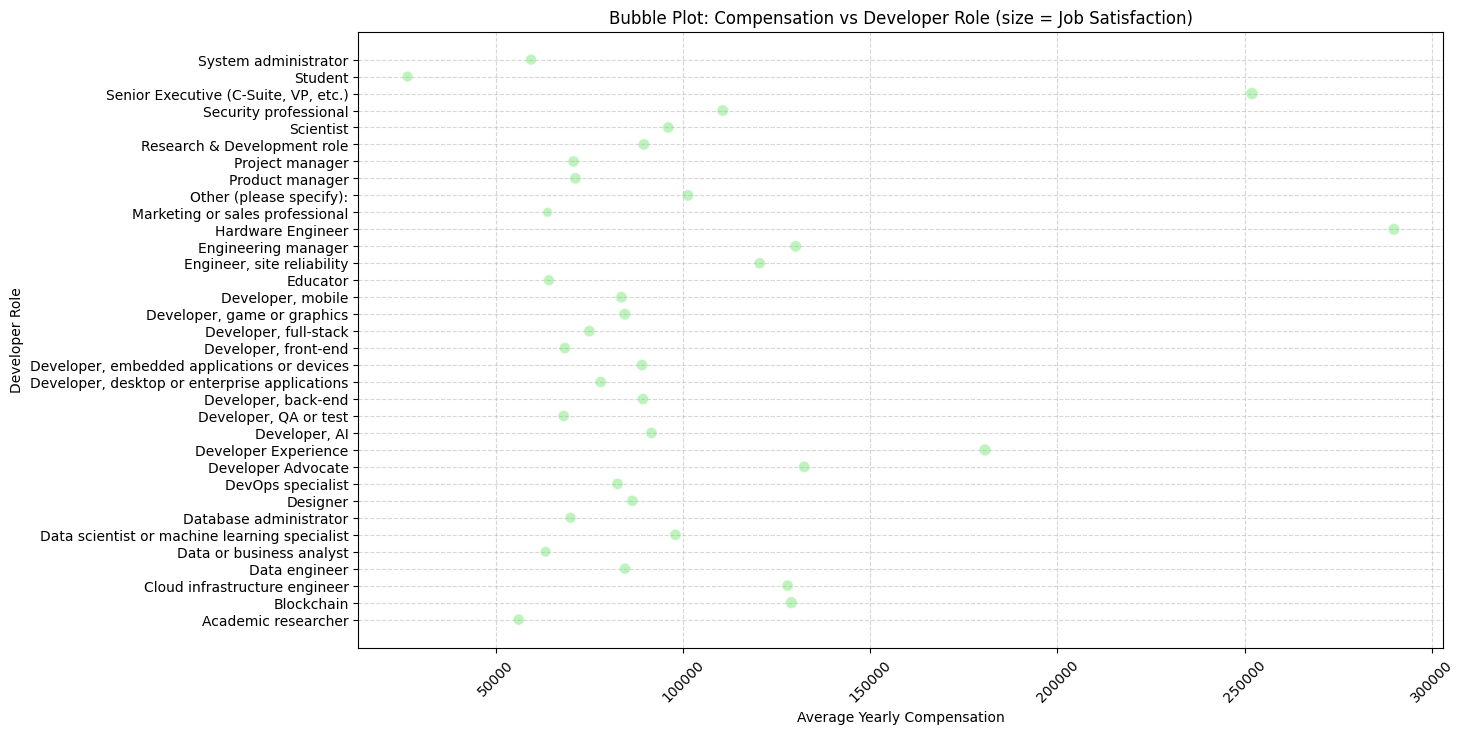

In [21]:
##Write your code here
# ===================================================================================================
# Prepare DataFrame for needed columns
columns_needed = ['DevType', 'ConvertedCompYearly', 'JobSat']
df_dev = prepare_dataframe(df, columns_needed)

# Drop rows with missing DevType or ConvertedCompYearly
df_dev = df_dev.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat']).copy()

# ===================================================================================================
# Group by Developer Role and calculate average compensation and job satisfaction
dev_grouped = (
    df_dev.groupby('DevType')
    .agg({'ConvertedCompYearly': 'mean', 'JobSat': 'mean', 'DevType': 'count'})
    .rename(columns={'DevType': 'Count'})
    .reset_index()
)

# ===================================================================================================
# Bubble plot
plt.figure(figsize=(14,8))
plt.scatter(
    dev_grouped['ConvertedCompYearly'],
    dev_grouped['DevType'],
    s=dev_grouped['JobSat']*10,  # Bubble size proportional to JobSat
    alpha=0.6,
    c='lightgreen',
    edgecolors='w'
)

plt.xlabel('Average Yearly Compensation')
plt.ylabel('Developer Role')
plt.title('Bubble Plot: Compensation vs Developer Role (size = Job Satisfaction)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


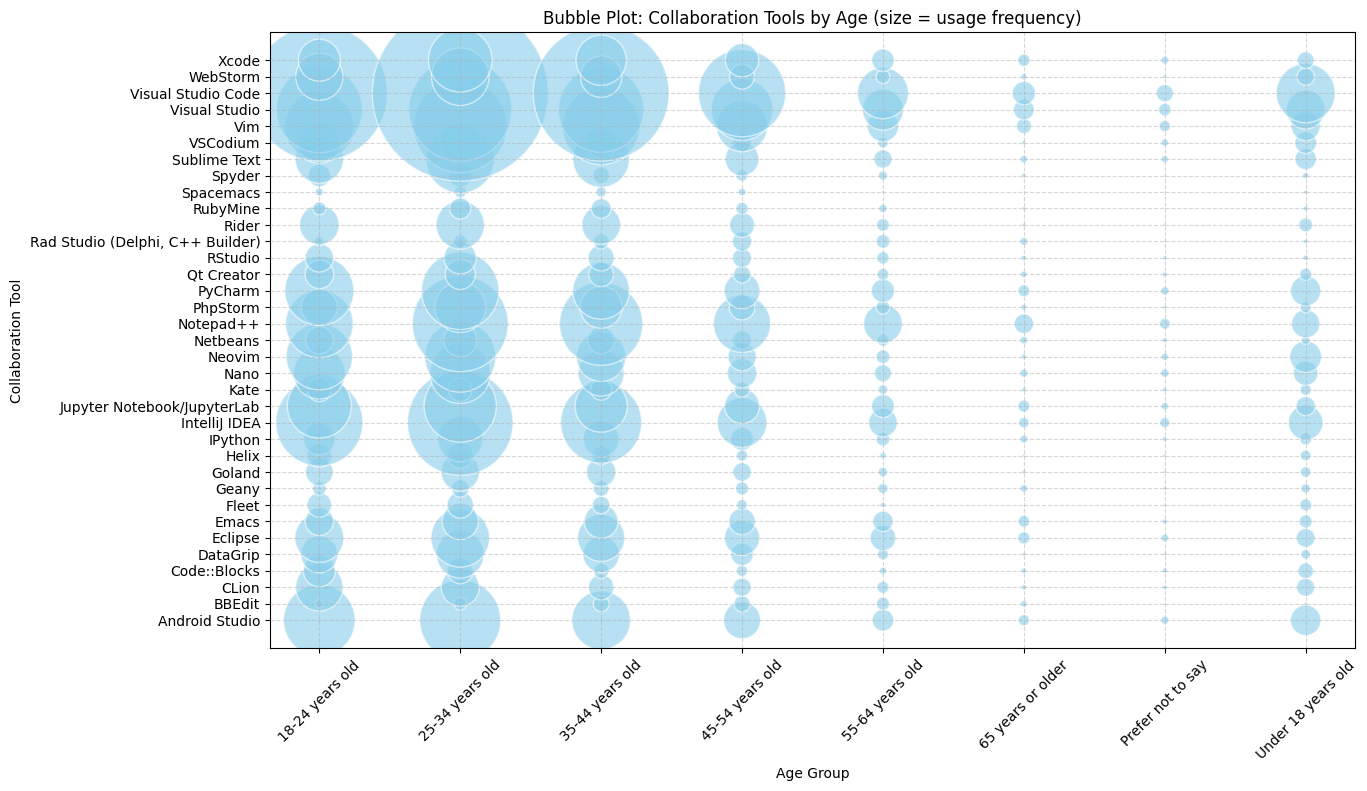

In [24]:
##Write your code here
# ===================================================================================================
# Prepare DataFrame for needed columns
columns_needed = ['Age', 'NEWCollabToolsHaveWorkedWith']
df_tools = prepare_dataframe(df, columns_needed)

# Drop NaN in NEWCollabToolsHaveWorkedWith
df_tools = df_tools.dropna(subset=['NEWCollabToolsHaveWorkedWith']).copy()

# ===================================================================================================
# Split tools and explode
df_tools['NEWCollabToolsHaveWorkedWith'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_tools = df_tools.explode('NEWCollabToolsHaveWorkedWith')

# Remove leading/trailing spaces in tool names
df_tools['NEWCollabToolsHaveWorkedWith'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.strip()

# ===================================================================================================
# Group by Age and Tool, count frequencies
tool_counts = (
    df_tools.groupby(['Age', 'NEWCollabToolsHaveWorkedWith'])
    .size()
    .reset_index(name='Frequency')
)

# ===================================================================================================
# Bubble plot
plt.figure(figsize=(14,8))
plt.scatter(
    tool_counts['Age'],
    tool_counts['NEWCollabToolsHaveWorkedWith'],
    s=tool_counts['Frequency'],  # Bubble size proportional to usage frequency
    alpha=0.6,
    c='skyblue',
    edgecolors='w'
)

plt.xlabel('Age Group')
plt.ylabel('Collaboration Tool')
plt.title('Bubble Plot: Collaboration Tools by Age (size = usage frequency)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



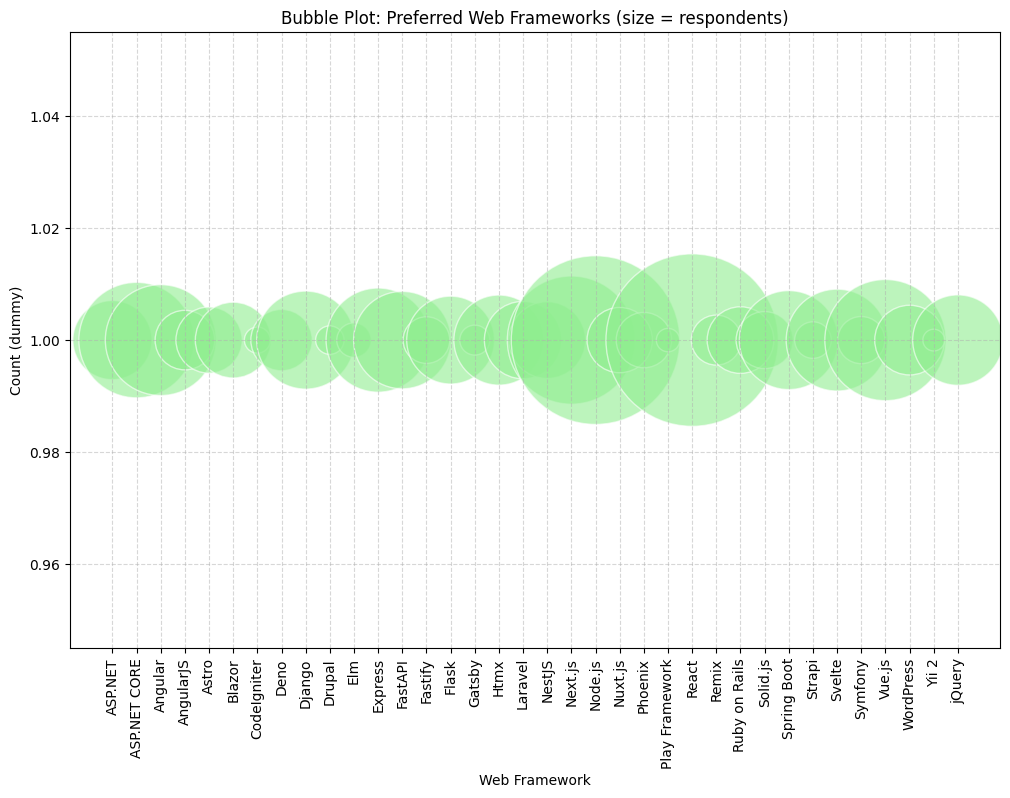

In [26]:
##Write your code here
# ===================================================================================================
# Prepare DataFrame for needed columns
columns_needed = ['WebframeWantToWorkWith']
df_web = prepare_dataframe(df, columns_needed)

# ===================================================================================================
# Split frameworks and explode
df_web['WebframeWantToWorkWith'] = df_web['WebframeWantToWorkWith'].str.split(';')
df_web = df_web.explode('WebframeWantToWorkWith')

# Remove leading/trailing spaces in framework names
df_web['WebframeWantToWorkWith'] = df_web['WebframeWantToWorkWith'].str.strip()

# ===================================================================================================
# Group by Framework and count frequencies
web_counts = (
    df_web.groupby('WebframeWantToWorkWith')
    .size()
    .reset_index(name='Frequency')
)

# ===================================================================================================
# Bubble plot
plt.figure(figsize=(12,8))
plt.scatter(
    web_counts['WebframeWantToWorkWith'],
    [1]*len(web_counts),  # Dummy y-axis just to align bubbles horizontally
    s=web_counts['Frequency'],  # Bubble size = number of respondents
    alpha=0.6,
    c='lightgreen',
    edgecolors='w'
)

plt.xlabel('Web Framework')
plt.ylabel('Count (dummy)')
plt.title('Bubble Plot: Preferred Web Frameworks (size = respondents)')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



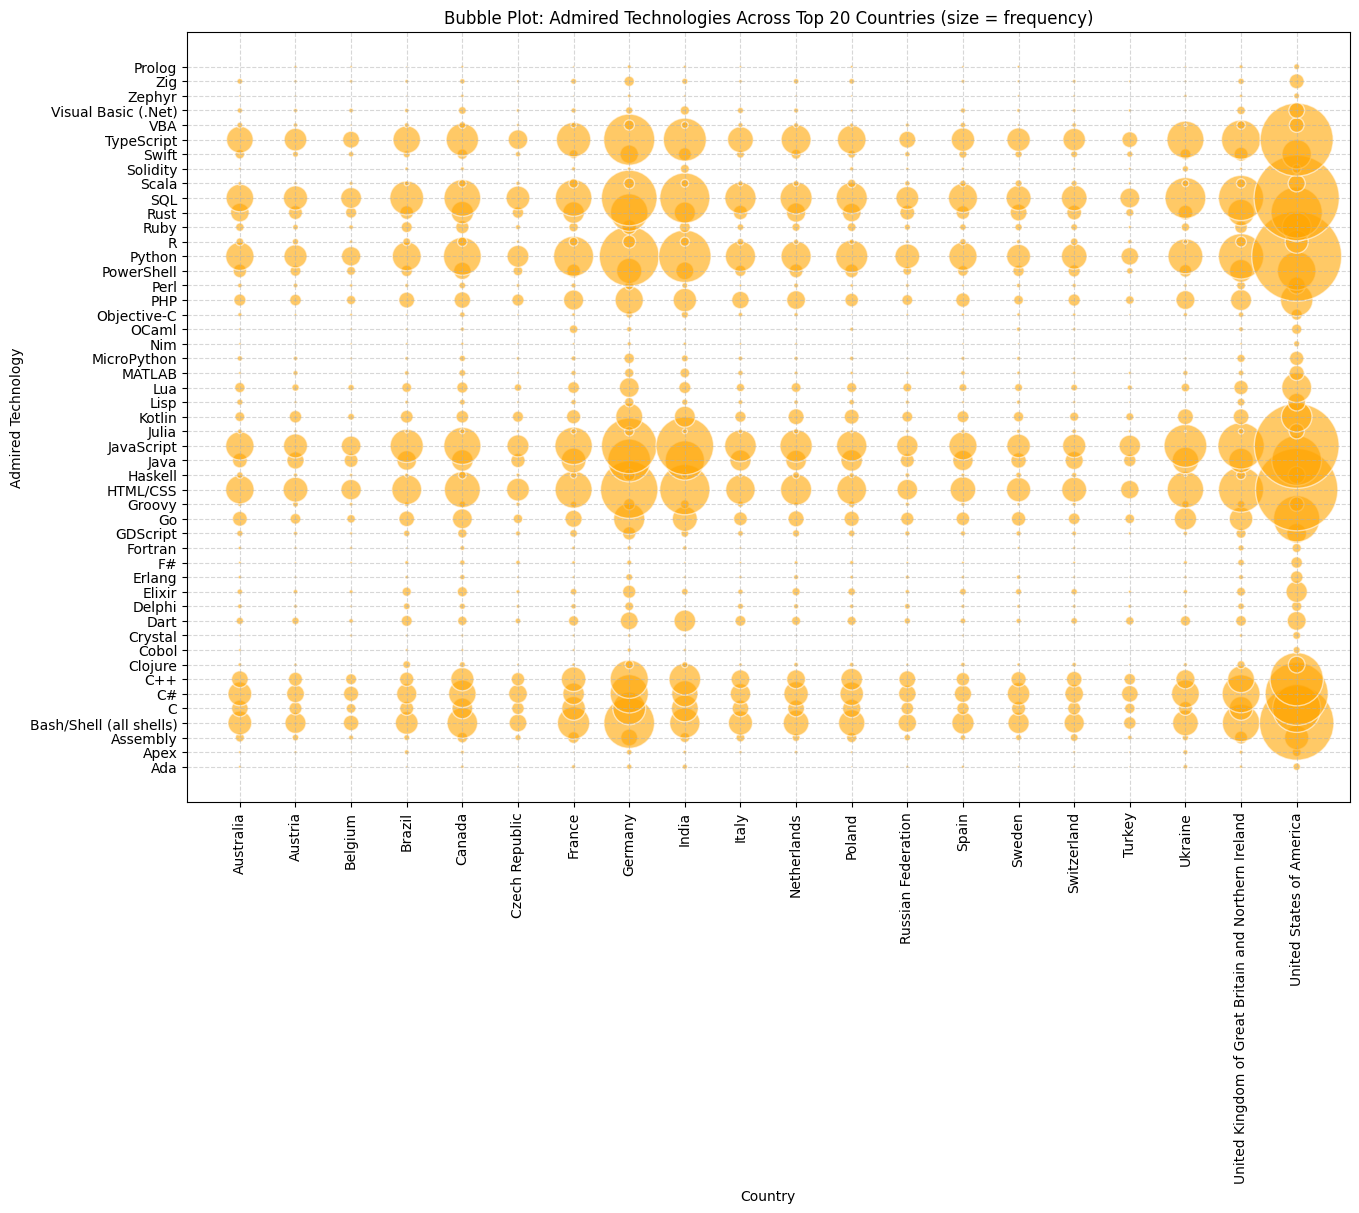

In [29]:
##Write your code here
# ===================================================================================================
# Prepare DataFrame for needed columns
columns_needed = ['Country', 'LanguageAdmired']
df_admired = prepare_dataframe(df, columns_needed)

# ===================================================================================================
# Split admired languages and explode
df_admired['LanguageAdmired'] = df_admired['LanguageAdmired'].str.split(';')
df_admired = df_admired.explode('LanguageAdmired')

# Remove leading/trailing spaces in language names
df_admired['LanguageAdmired'] = df_admired['LanguageAdmired'].str.strip()

# ===================================================================================================
# Select top 20 countries by respondent count
top_countries = df_admired['Country'].value_counts().nlargest(20).index
df_admired_top = df_admired[df_admired['Country'].isin(top_countries)]

# ===================================================================================================
# Group by Country and Language, count frequencies
admired_counts = (
    df_admired_top.groupby(['Country', 'LanguageAdmired'])
    .size()
    .reset_index(name='Frequency')
)

# ===================================================================================================
# Bubble plot
plt.figure(figsize=(15,10))
plt.scatter(
    admired_counts['Country'],
    admired_counts['LanguageAdmired'],
    s=admired_counts['Frequency'],  # Bubble size = number of respondents
    alpha=0.6,
    c='orange',
    edgecolors='w'
)

plt.xlabel('Country')
plt.ylabel('Admired Technology')
plt.title('Bubble Plot: Admired Technologies Across Top 20 Countries (size = frequency)')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
